# **Exploratory Data Analysis on Boston Housing Dataset**

## Information:

| <h3>Course Code:</h3> | <h3>CSE303</h3> |
| ------------ | ------------|
| <h3>Section:</h3>     | <h3>06</h3> |
| <h3>Team:</h3>        | <h3>04</h3> |

## Submitted by

### Name&nbsp;: Aklhak Hossain
### ID&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 2022-3-60-057


-----

# **Importing File**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

df = pd.read_csv('Boston_Housing_assignment.csv')
print(df.head())
print(df.info())
target_column = 'medv'

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0   396.9   4.98  24.0  
1   396.9   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4   396.9   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    504 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      505 non-null    float6

In [22]:
df_cp = df.copy()
print(df_cp.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black       object
lstat      float64
medv       float64
dtype: object



## **2. Data Cleaning**

### 2.1 Missing Values
- Identify missing values.
- Show % missing for each column.
- Apply imputation: Mean, Median, or Mode.
- **Visualizations**: Missing data barplot/heatmap.

---



In [23]:
print(df_cp.isnull().sum())

crim       0
zn         0
indus      2
chas       0
nox        1
rm         0
age        0
dis        1
rad        0
tax        0
ptratio    1
black      1
lstat      1
medv       0
dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_cols = [col for col in df_cp.columns if df_cp[col].dtype == 'object']
numerical_cols = [col for col in df_cp.columns if df_cp[col].dtype in ['int64', 'float64']]

num_imputer = SimpleImputer(strategy='mean')
df_cp[numerical_cols] = num_imputer.fit_transform(df_cp[numerical_cols])

if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_cp[categorical_cols] = cat_imputer.fit_transform(df_cp[categorical_cols])
else:
    print("No categorical columns found to impute.")


if categorical_cols:
    df_cp_encoded = pd.get_dummies(df_cp, columns=categorical_cols, drop_first=True)
else:
    df_cp_encoded = df_cp.copy()
    print("No categorical columns to one-hot encode.")


print("After encoding, dataset shape:", df_cp_encoded.shape)

print(df_cp_encoded.isnull().sum())

After encoding, dataset shape: (506, 370)
crim           0
zn             0
indus          0
chas           0
nox            0
              ..
black_88.27    0
black_88.63    0
black_9.32     0
black_96.73    0
black_97.95    0
Length: 370, dtype: int64


## **3. Outlier Detection**

### 3.1 Visual Detection
- Boxplots for each numerical column.

### 3.2 Statistical Detection
- Z-score or IQR method to detect outliers.
- Cap/remove outliers.
- Re-plot boxplots.

---



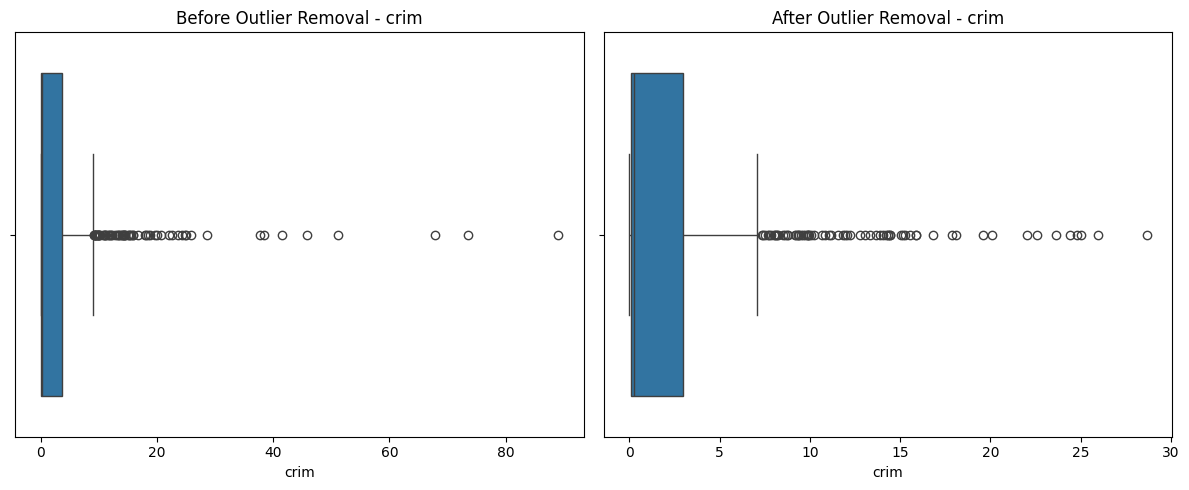

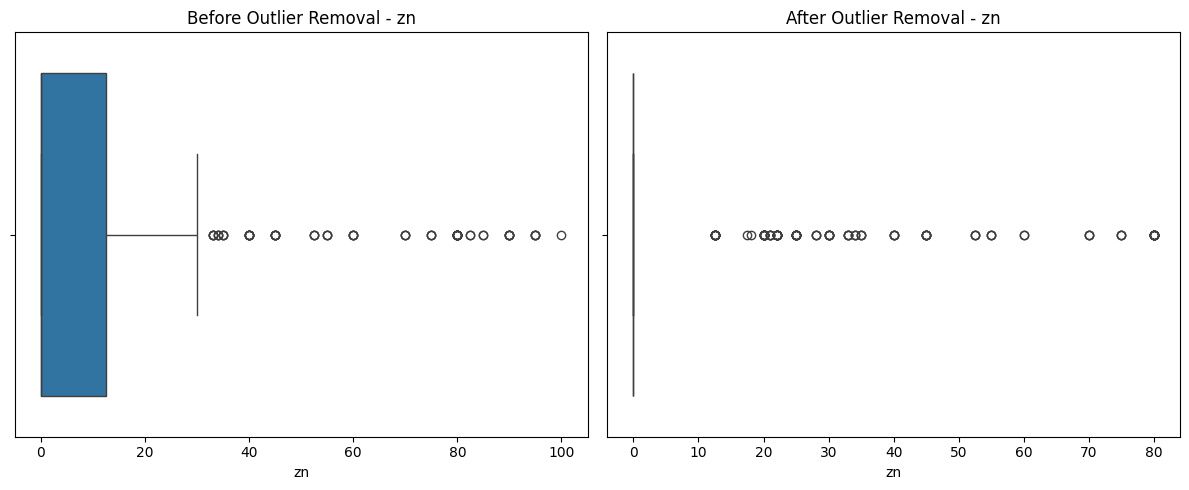

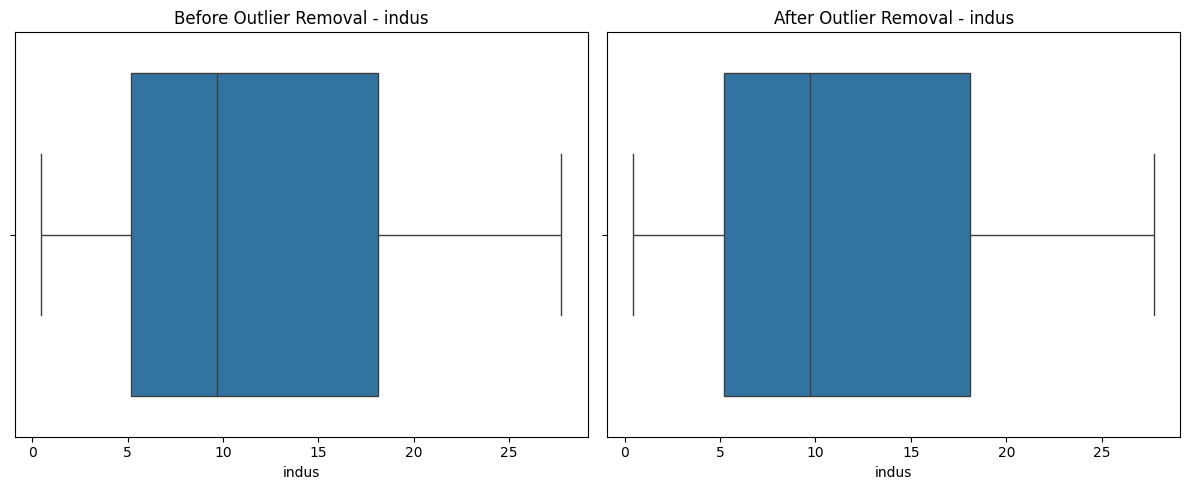

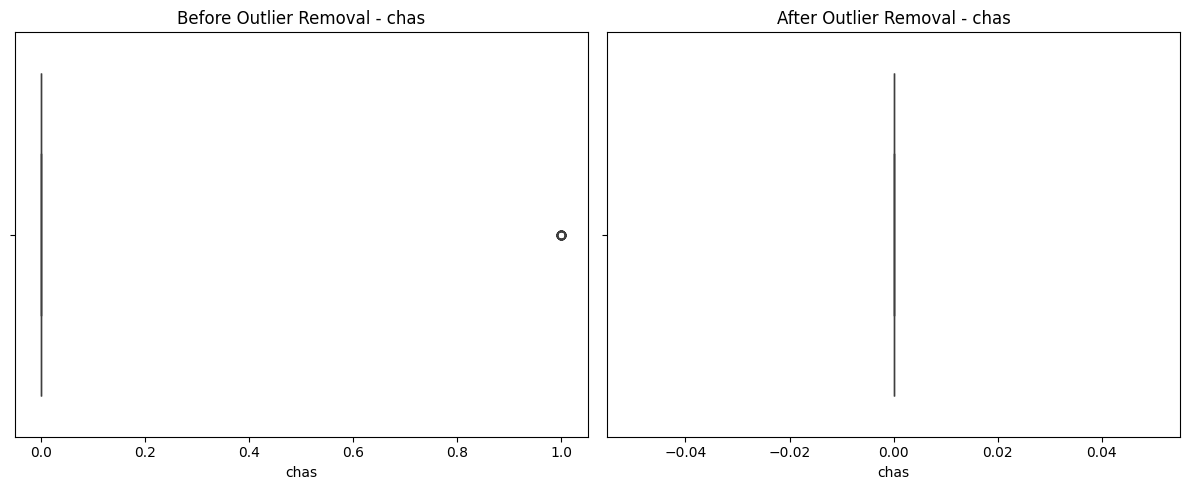

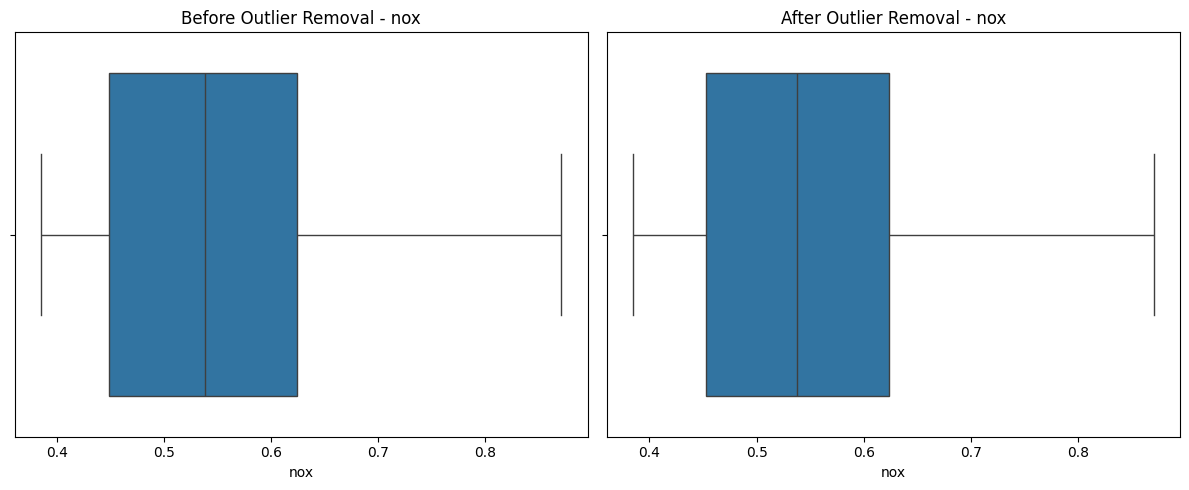

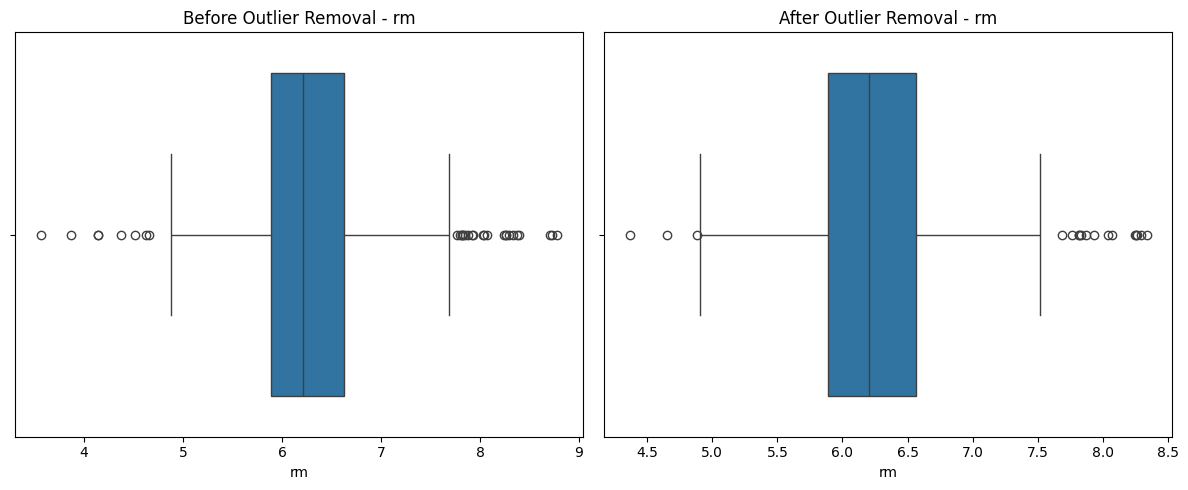

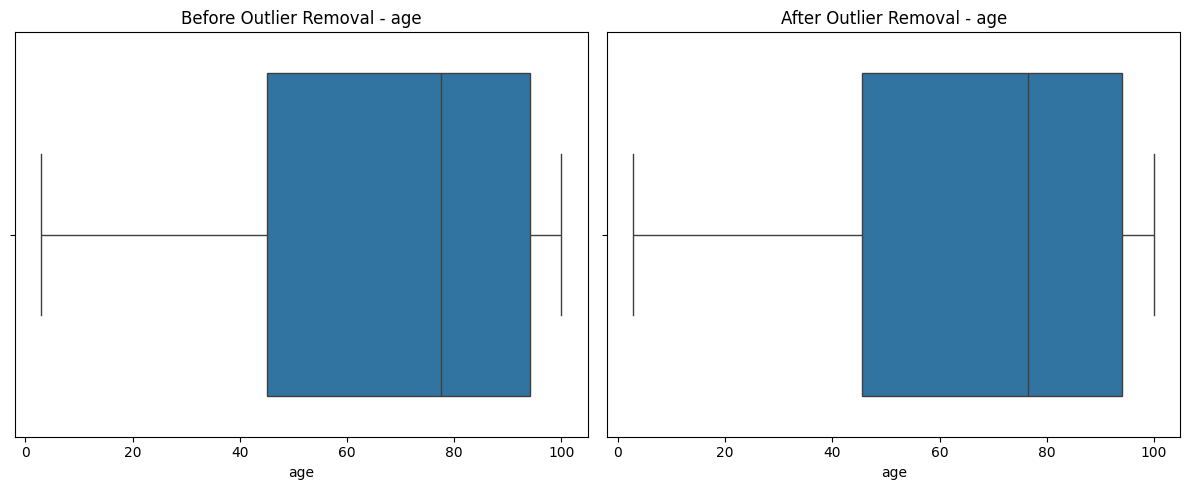

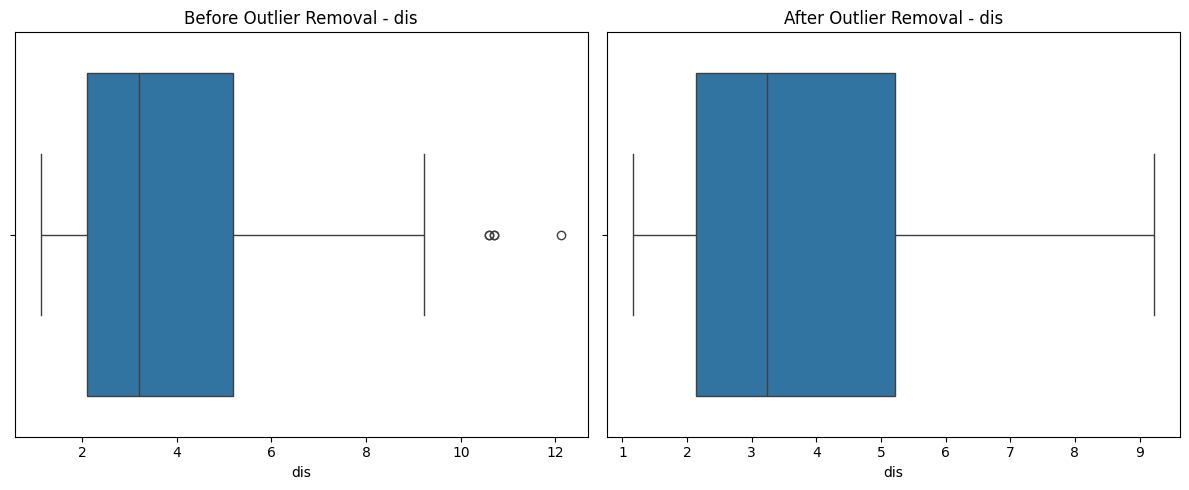

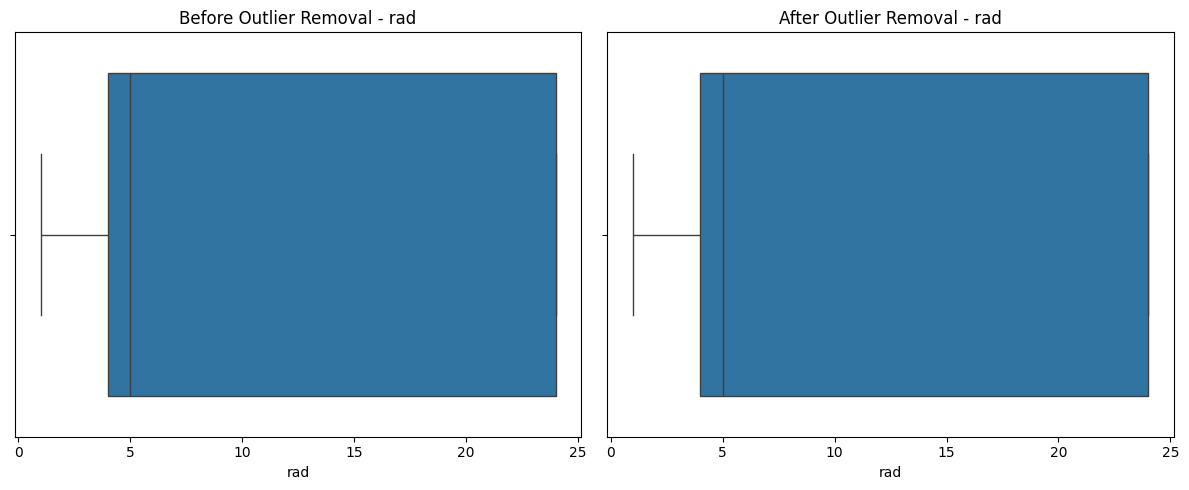

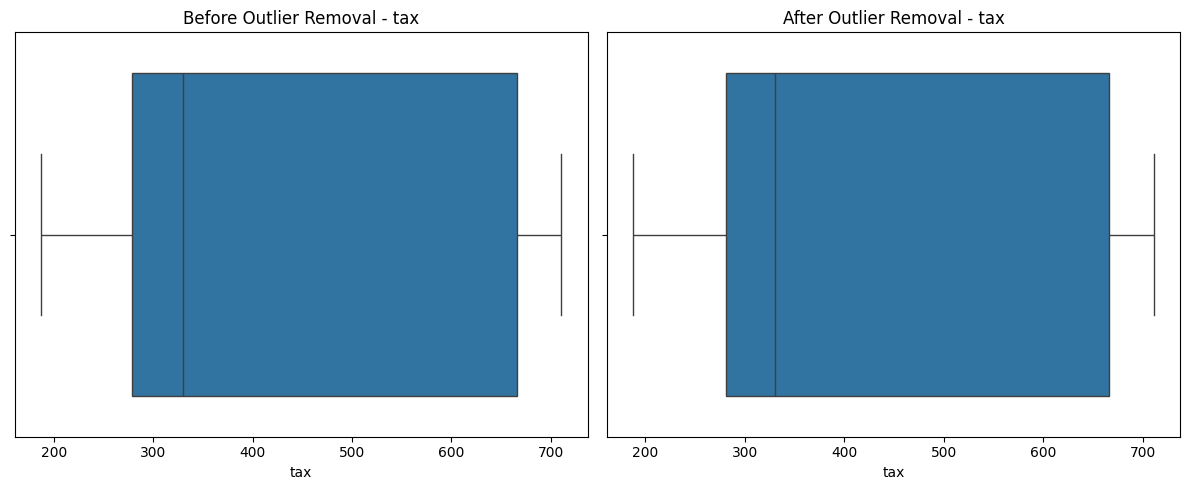

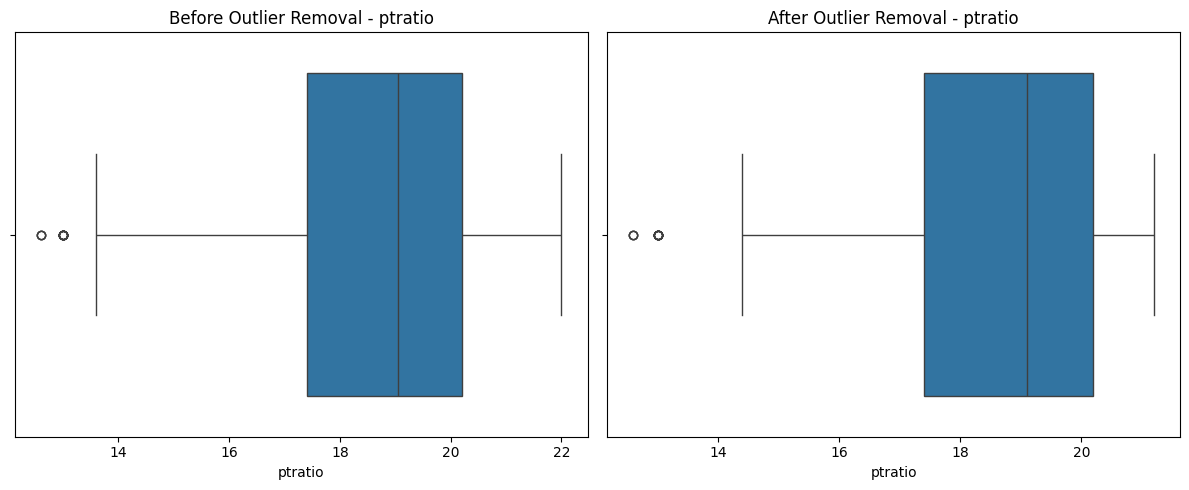

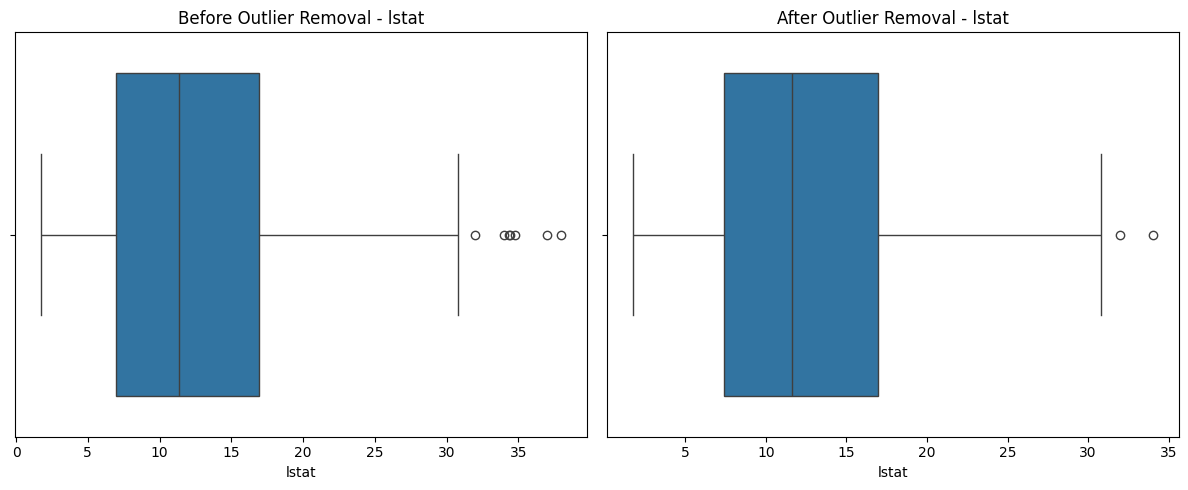

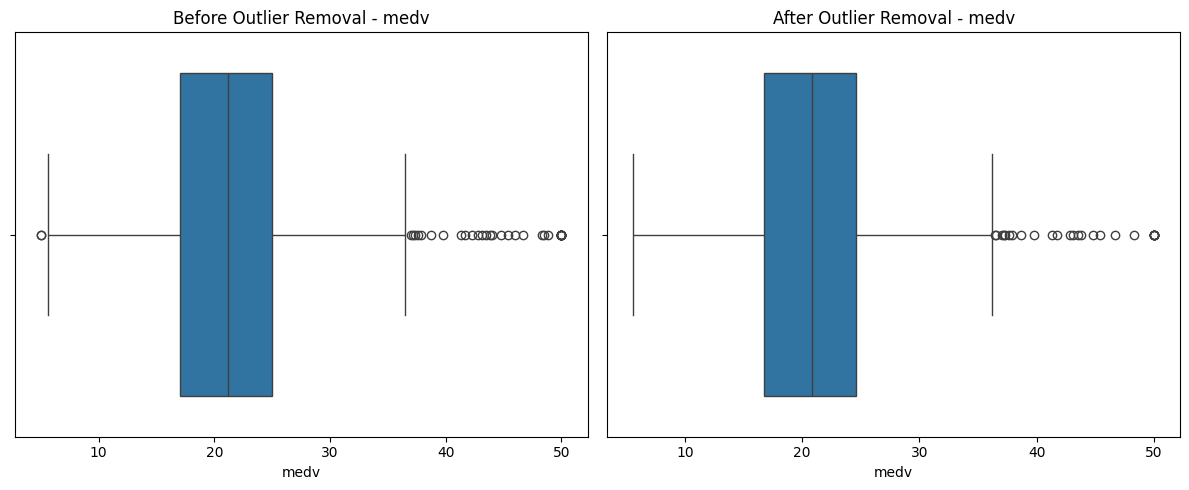

In [24]:
df_numeric = df_cp_encoded.select_dtypes(include=[np.number])
z = np.abs(stats.zscore(df_numeric))
df_no_outliers = df_numeric[(z < 3).all(axis=1)]

for col in df_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(x=df_numeric[col], ax=axes[0])
    axes[0].set_title(f'Before Outlier Removal - {col}')

    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[1].set_title(f'After Outlier Removal - {col}')

    plt.tight_layout()
    plt.show()

## **4. Univariate Analysis**

### 4.1 For Each Column
- Histogram + Boxplot.
- Normality Test (Shapiro/D’Agostino).
- Description of distribution (Normal/Skewed).

---



<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


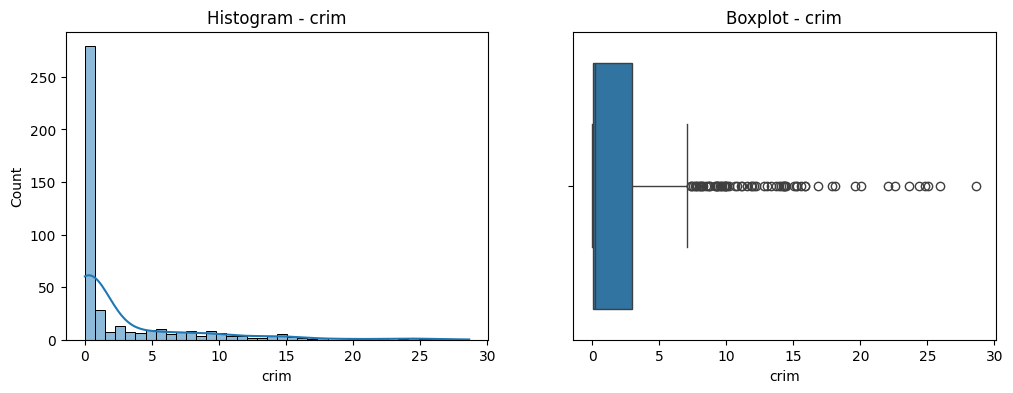

crim - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


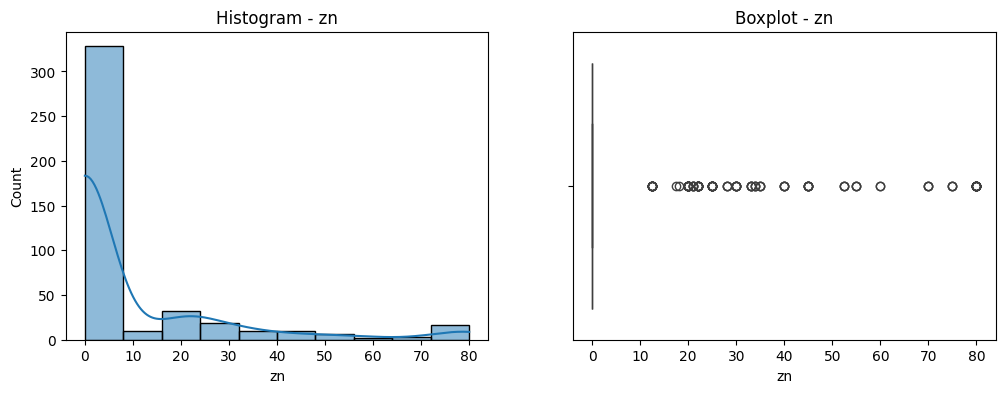

zn - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


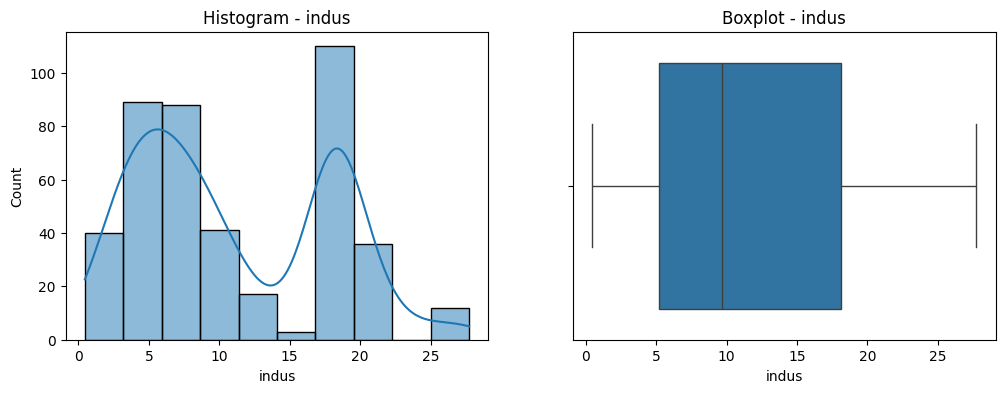

indus - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


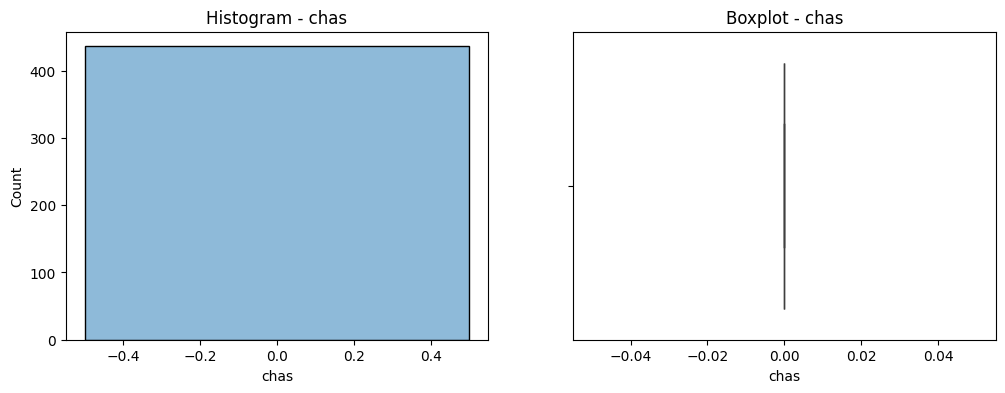

chas - Shapiro-Wilk Test p-value: 1.0000
Probably Normal


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


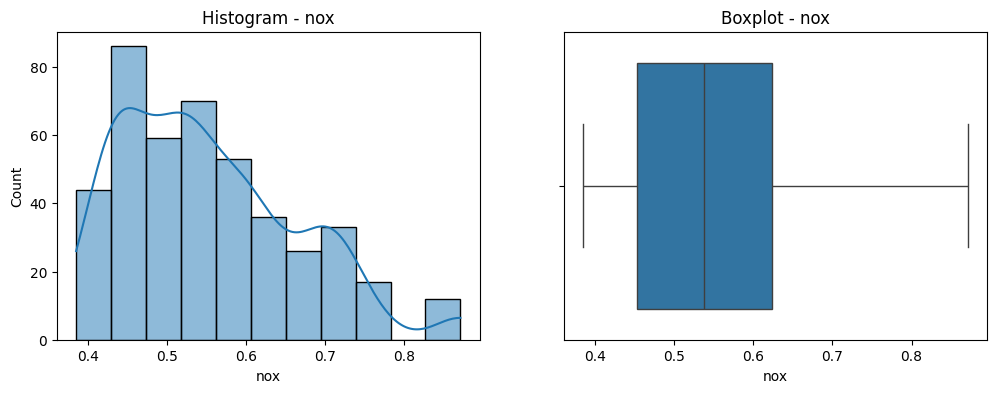

nox - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


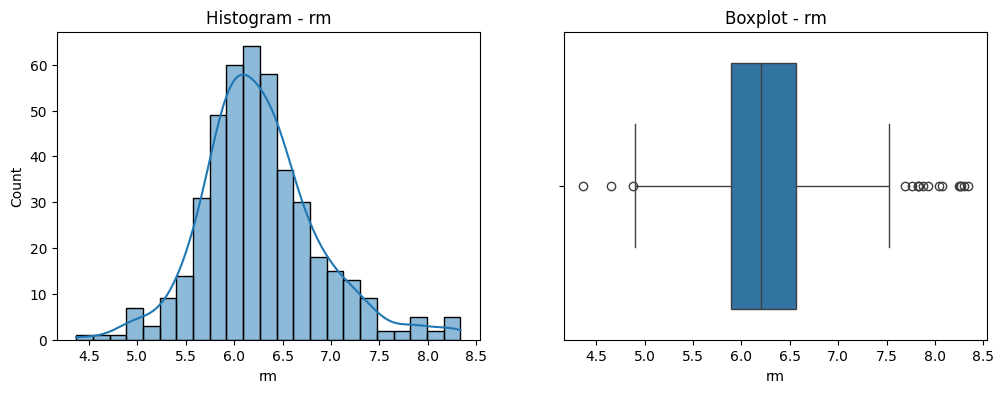

rm - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


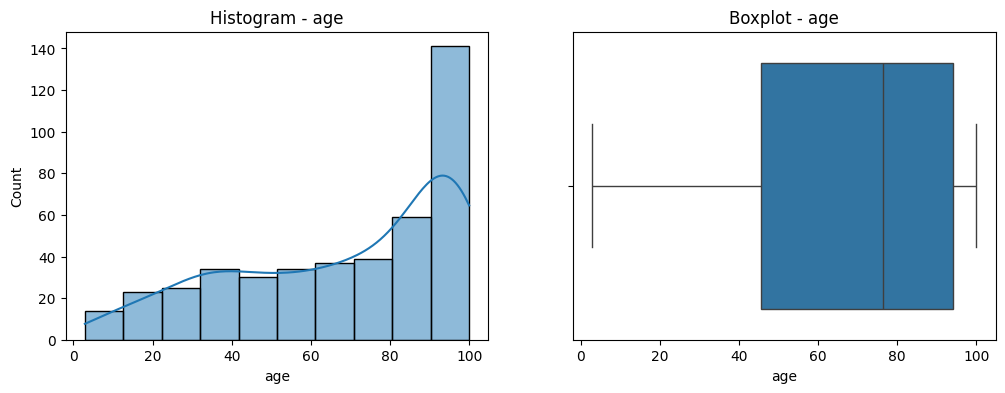

age - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


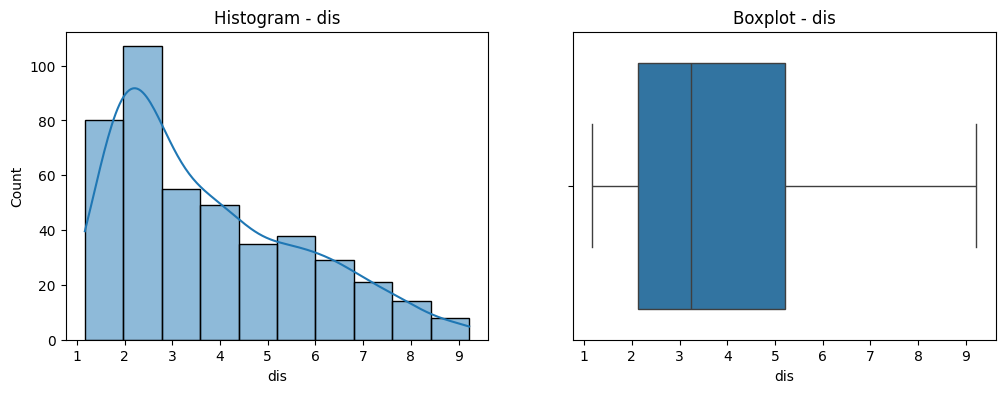

dis - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


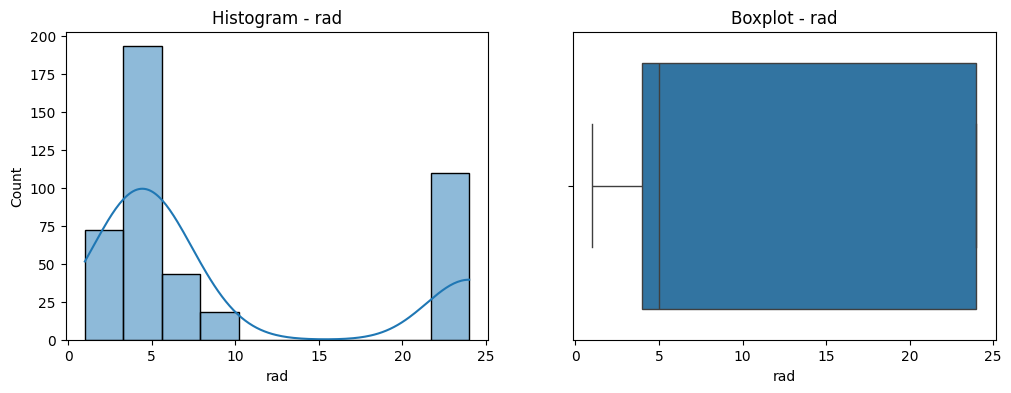

rad - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


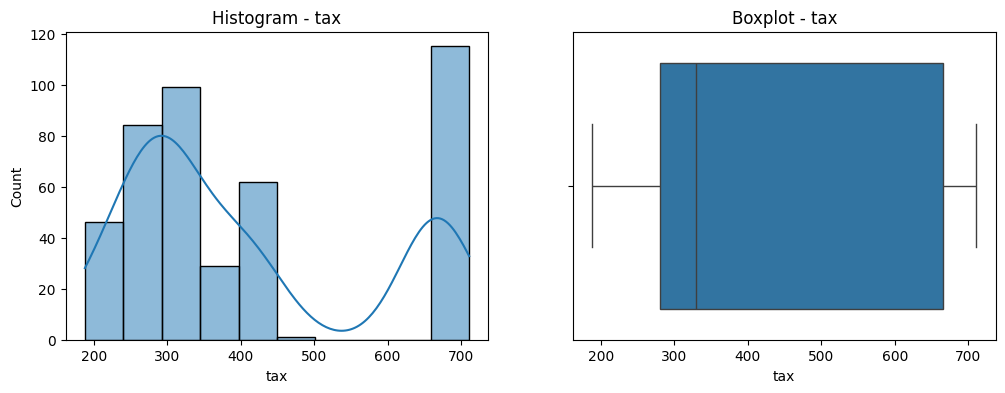

tax - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


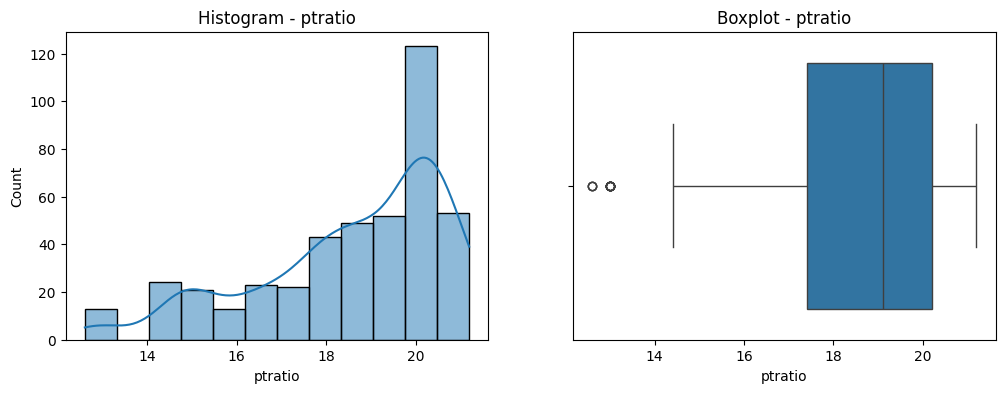

ptratio - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


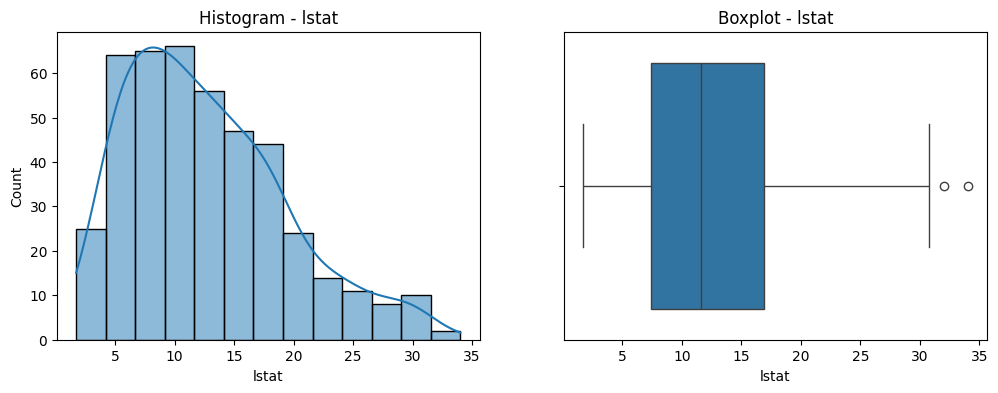

lstat - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


<ipython-input-26-cda0b35b5d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
<ipython-input-26-cda0b35b5d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.dropna(subset=[col], inplace=True)


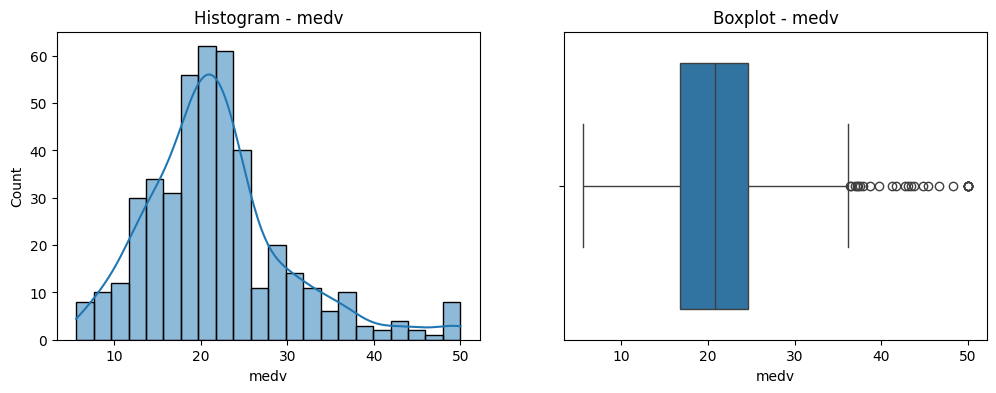

medv - Shapiro-Wilk Test p-value: 0.0000
Probably Not Normal


In [26]:
### 3. UNIVARIATE ANALYSIS
for col in df_numeric:
    df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')

    df_no_outliers.dropna(subset=[col], inplace=True)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_no_outliers[col], kde=True, ax=axes[0])
    sns.boxplot(x=df_no_outliers[col], ax=axes[1])
    axes[0].set_title(f'Histogram - {col}')
    axes[1].set_title(f'Boxplot - {col}')
    plt.show()

    stat, p = stats.shapiro(df_no_outliers[col])
    print(f"{col} - Shapiro-Wilk Test p-value: {p:.4f}")
    print("Probably Normal" if p > 0.05 else "Probably Not Normal")

## **5. Multivariate Analysis**

### 5.1 Pairwise Relationships
- Pairplot of selected variables vs MEDV.
- Scatterplots/Boxplots for key variables.

### 5.2 Correlation Matrix
- Heatmap showing correlation among numerical variables.
- Highlight important correlations with MEDV.

---


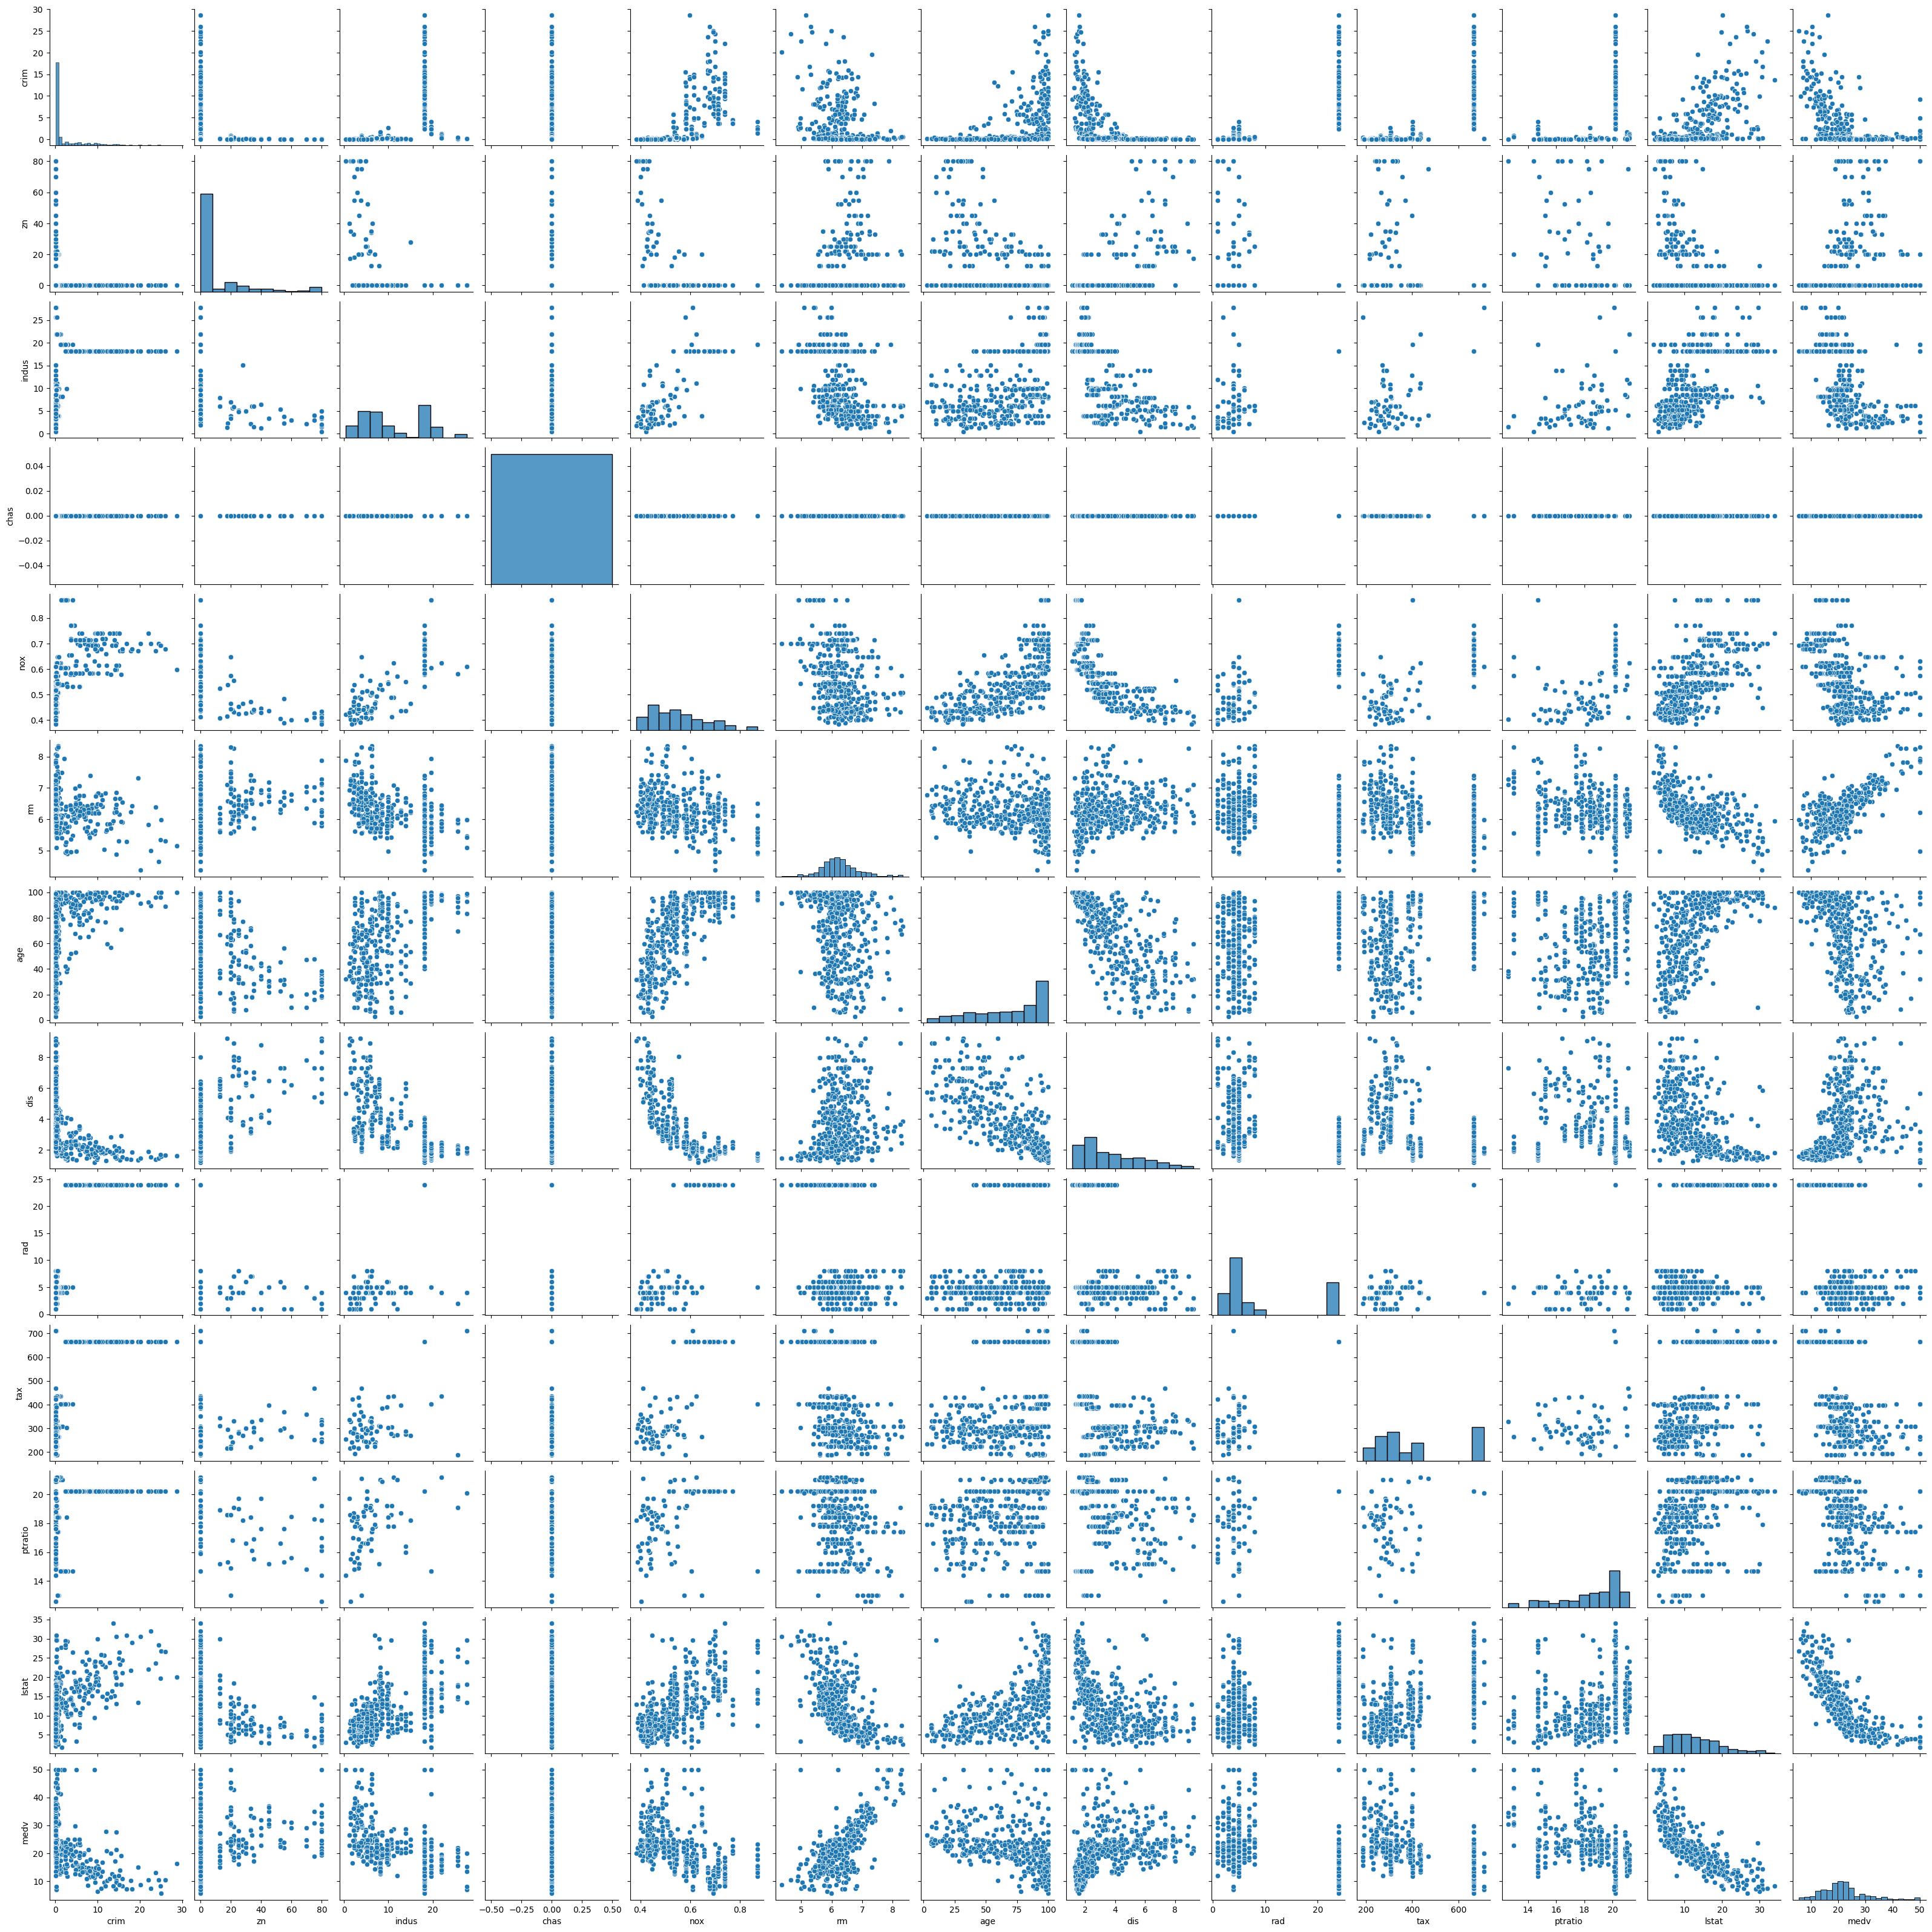

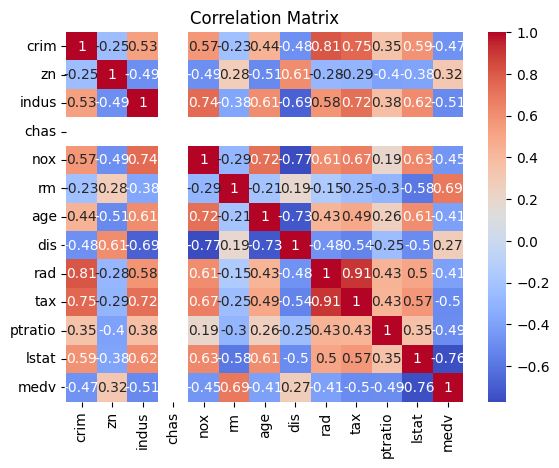

In [33]:
if col in df_numeric.columns:
    sns.pairplot(df_no_outliers[df_numeric.columns])
    plt.show()

    sns.heatmap(df_no_outliers[df_numeric.columns].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Train and evaluate Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_cp_encoded.drop(target_column, axis=1)
y = df_cp_encoded[target_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression RMSE: {rmse:.4f}")


Linear Regression RMSE: 5.3496


# Train and evaluate the Decision Tree model

In [37]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree RMSE: {rmse_dt:.4f}")


Decision Tree RMSE: 3.5093


# Train and evaluate the K-Nearest Neighbors (KNN) model

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"KNN Regression RMSE (k=5): {rmse_knn:.4f}")

KNN Regression RMSE (k=5): 5.3163


# Train and evaluate the Random Forest model

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest RMSE: {rmse_rf:.4f}")

Random Forest RMSE: 3.2425


# Selecting The Best Model

In [40]:
results = {
    'Linear Regression': rmse,
    'Decision Tree': rmse_dt,
    'KNN (k=5)': rmse_knn,
    'Random Forest': rmse_rf
}

for model, error in results.items():
    print(f"{model}: RMSE = {error:.4f}")

best_model = min(results, key=results.get)
print(f"\nBest model based on RMSE: {best_model}")


Linear Regression: RMSE = 5.3496
Decision Tree: RMSE = 3.5093
KNN (k=5): RMSE = 5.3163
Random Forest: RMSE = 3.2425

Best model based on RMSE: Random Forest
